In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [252]:
#creating the variable to read the excel file
path_file = 'creditcardmarketing.xlsx'

In [253]:
customer_df = pd.read_excel(path_file)

In [254]:
customer_df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [255]:
#checking the number of rows and columns
customer_df.shape

(18000, 17)

In [256]:
#from this i can see that there is 24 rows with NaN values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [257]:
customer_df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [258]:
#Changing the name of the columns according to PE8
#here to create a list to use a loop later
cols=[]

In [259]:
#here the loop to change to lower case and replace a space for a '_'
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(" ", "_"))

In [260]:
cols

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 '#_bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 '#_credit_cards_held',
 '#_homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

In [261]:
#here to replace the columns for what is stored in 'cols'
customer_df.columns=cols

In [262]:
#Checking current df with the modifications
customer_df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [263]:
#as some columns have the '#' i will replace it
customer_df = customer_df.rename(columns=lambda x: x.replace('#', ''))

In [264]:
customer_df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,_bank_accounts_open,overdraft_protection,credit_rating,_credit_cards_held,_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [265]:
#there are still some columns with a '_' at the beginning and instead of replace it i will modify those directly
customer_df=customer_df.rename(columns={'_bank_accounts_open':'bank_accounts_open', '_credit_cards_held':'credit_cards_held', '_homes_owned':'homes_owned'})

In [266]:
#checking the changes
customer_df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [267]:
#checking duplicates
customer_df.drop_duplicates(inplace=True)

In [268]:
#shape of df after removing duplicates
customer_df.shape

(18000, 17)

In [269]:
#there are not duplicated rows

In [270]:
#as i only have 24 rows with NaN values i will drop them directly
customer_df.dropna(inplace=True)

In [271]:
#here the current shape of the df
customer_df.shape

(17976, 17)

In [272]:
#creating categorical df
cat_df = customer_df.select_dtypes(object)

In [273]:
#checkin unique values in categorical df
for col in cat_df.columns:
    print(col, ":", cat_df[col].unique())
#no cleaning required

offer_accepted : ['No' 'Yes']
reward : ['Air Miles' 'Cash Back' 'Points']
mailer_type : ['Letter' 'Postcard']
income_level : ['High' 'Medium' 'Low']
overdraft_protection : ['No' 'Yes']
credit_rating : ['High' 'Medium' 'Low']
own_your_home : ['No' 'Yes']


In [274]:
#creating numerical df
num_df = customer_df.select_dtypes(np.number)

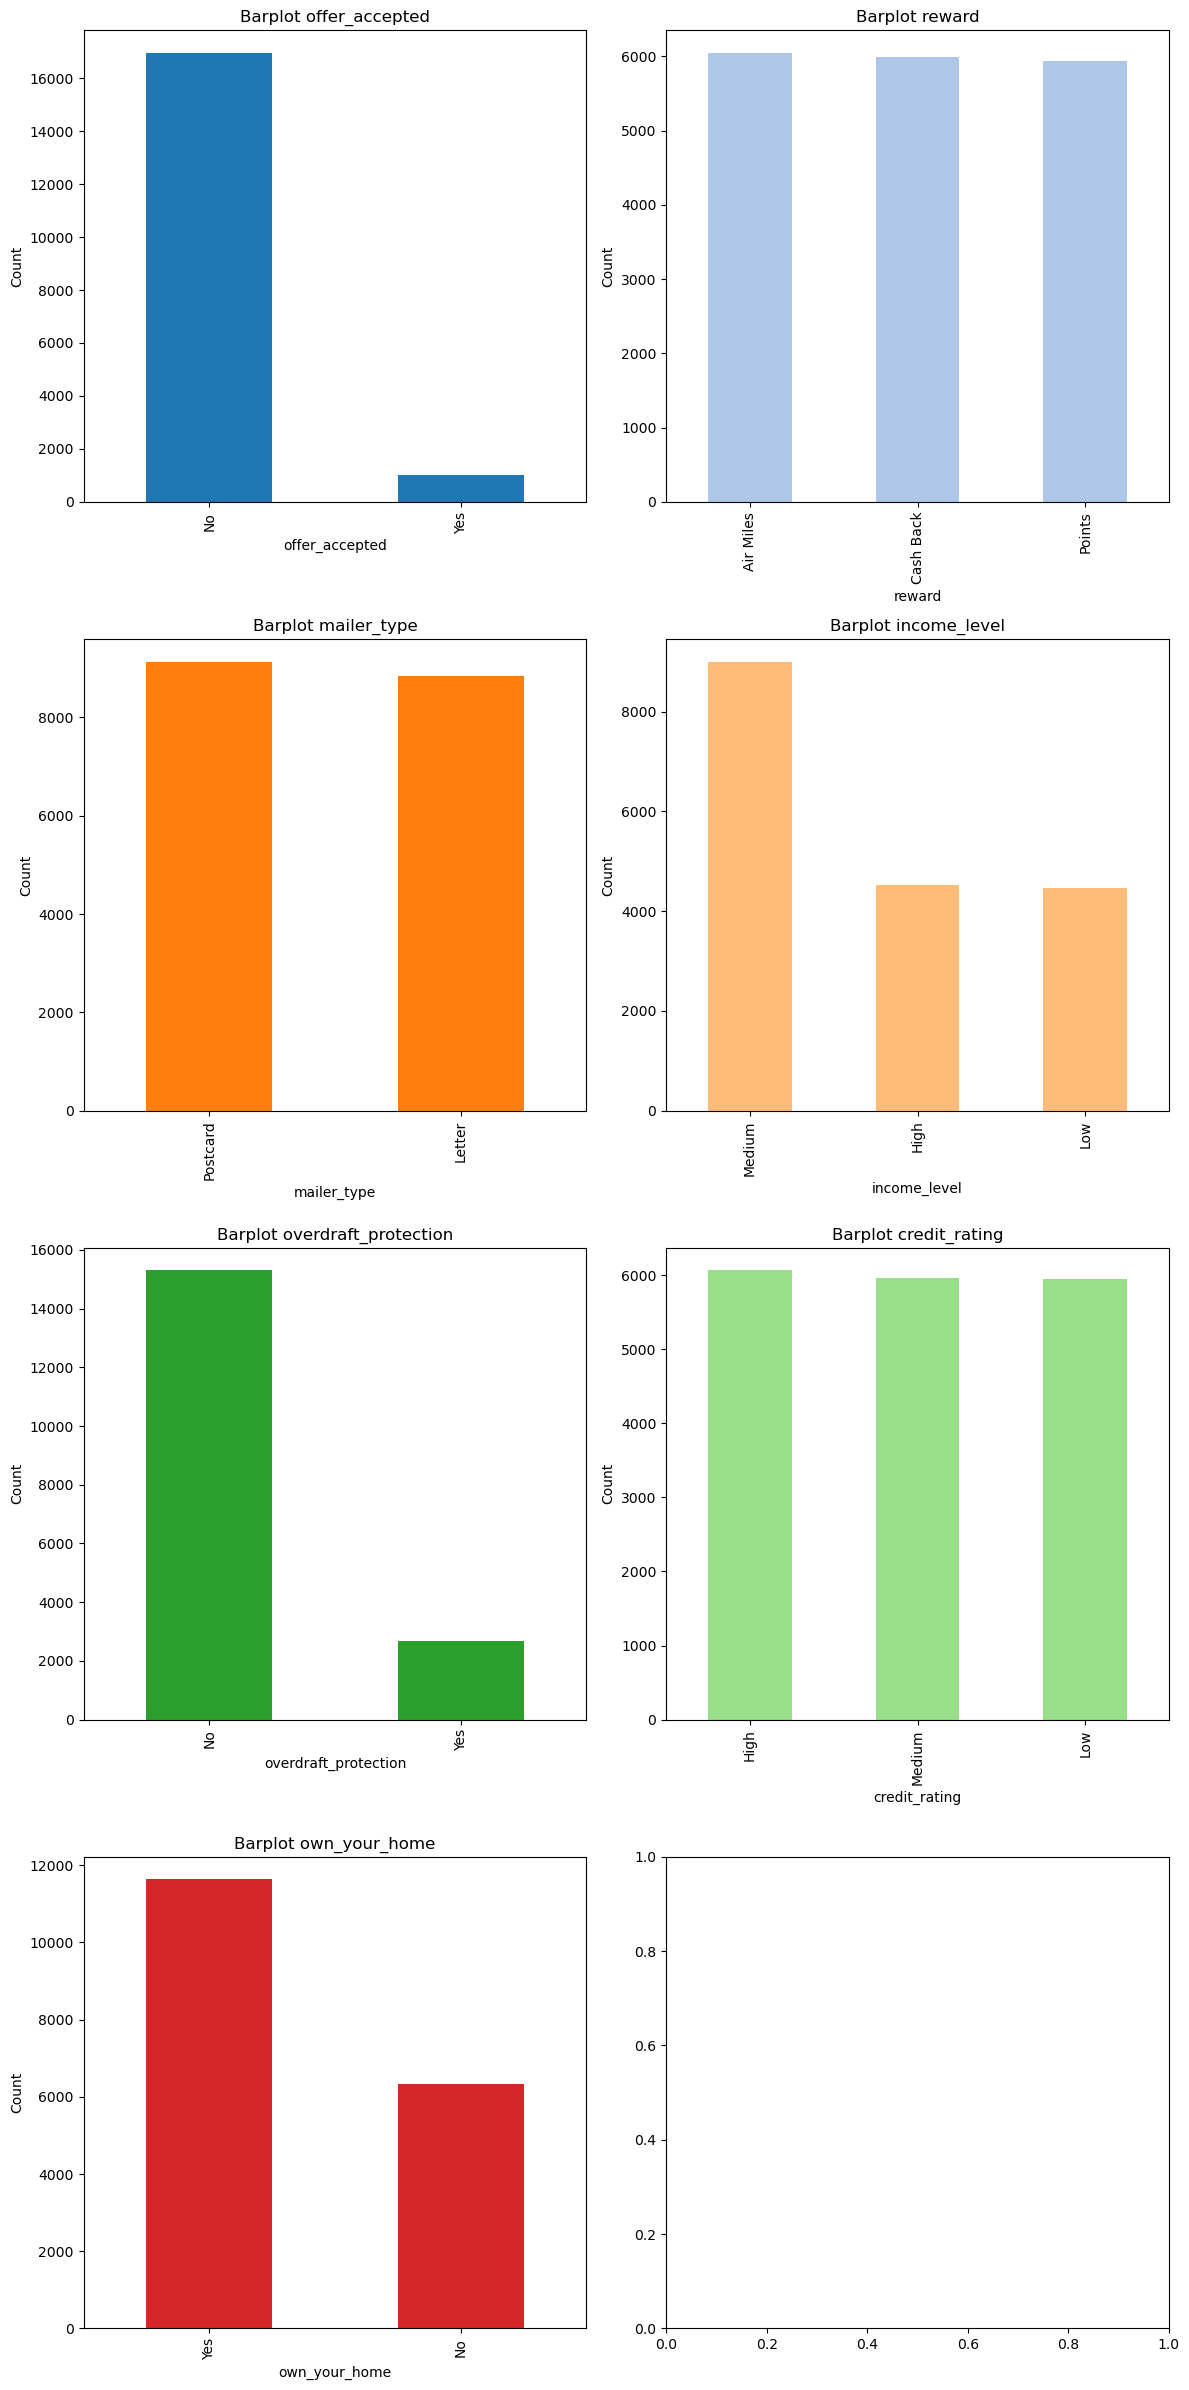

In [275]:
graficos_por_fila = 2
filas = (len(cat_df.columns) + graficos_por_fila - 1) // graficos_por_fila
colores = plt.cm.tab20.colors
fig, axs = plt.subplots(filas, graficos_por_fila, figsize=(12, 6 * filas))
for i, (column, color) in enumerate(zip(cat_df.columns, colores)):
    ax = axs[i // graficos_por_fila, i % graficos_por_fila]
    cat_df[column].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Barplot {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

As some of them are imbalanced (own_your_home, overdraft_protection, offer_accepted)
I will plot the "yes" to the offer to get more insights through a subset

In [276]:
#creating subset when answer to the offer is 'Yes'
sub_yes = cat_df[cat_df['offer_accepted'] == 'Yes']

In [277]:
#dropping column offer accepted before plotting
sub_yes = sub_yes.drop('offer_accepted', axis=1)

In [278]:
sub_yes.head()

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
27,Air Miles,Letter,Medium,No,Low,No
45,Air Miles,Postcard,High,Yes,Low,Yes
50,Air Miles,Postcard,Low,No,High,Yes
57,Air Miles,Postcard,Low,No,Medium,Yes
74,Cash Back,Postcard,High,No,Low,Yes


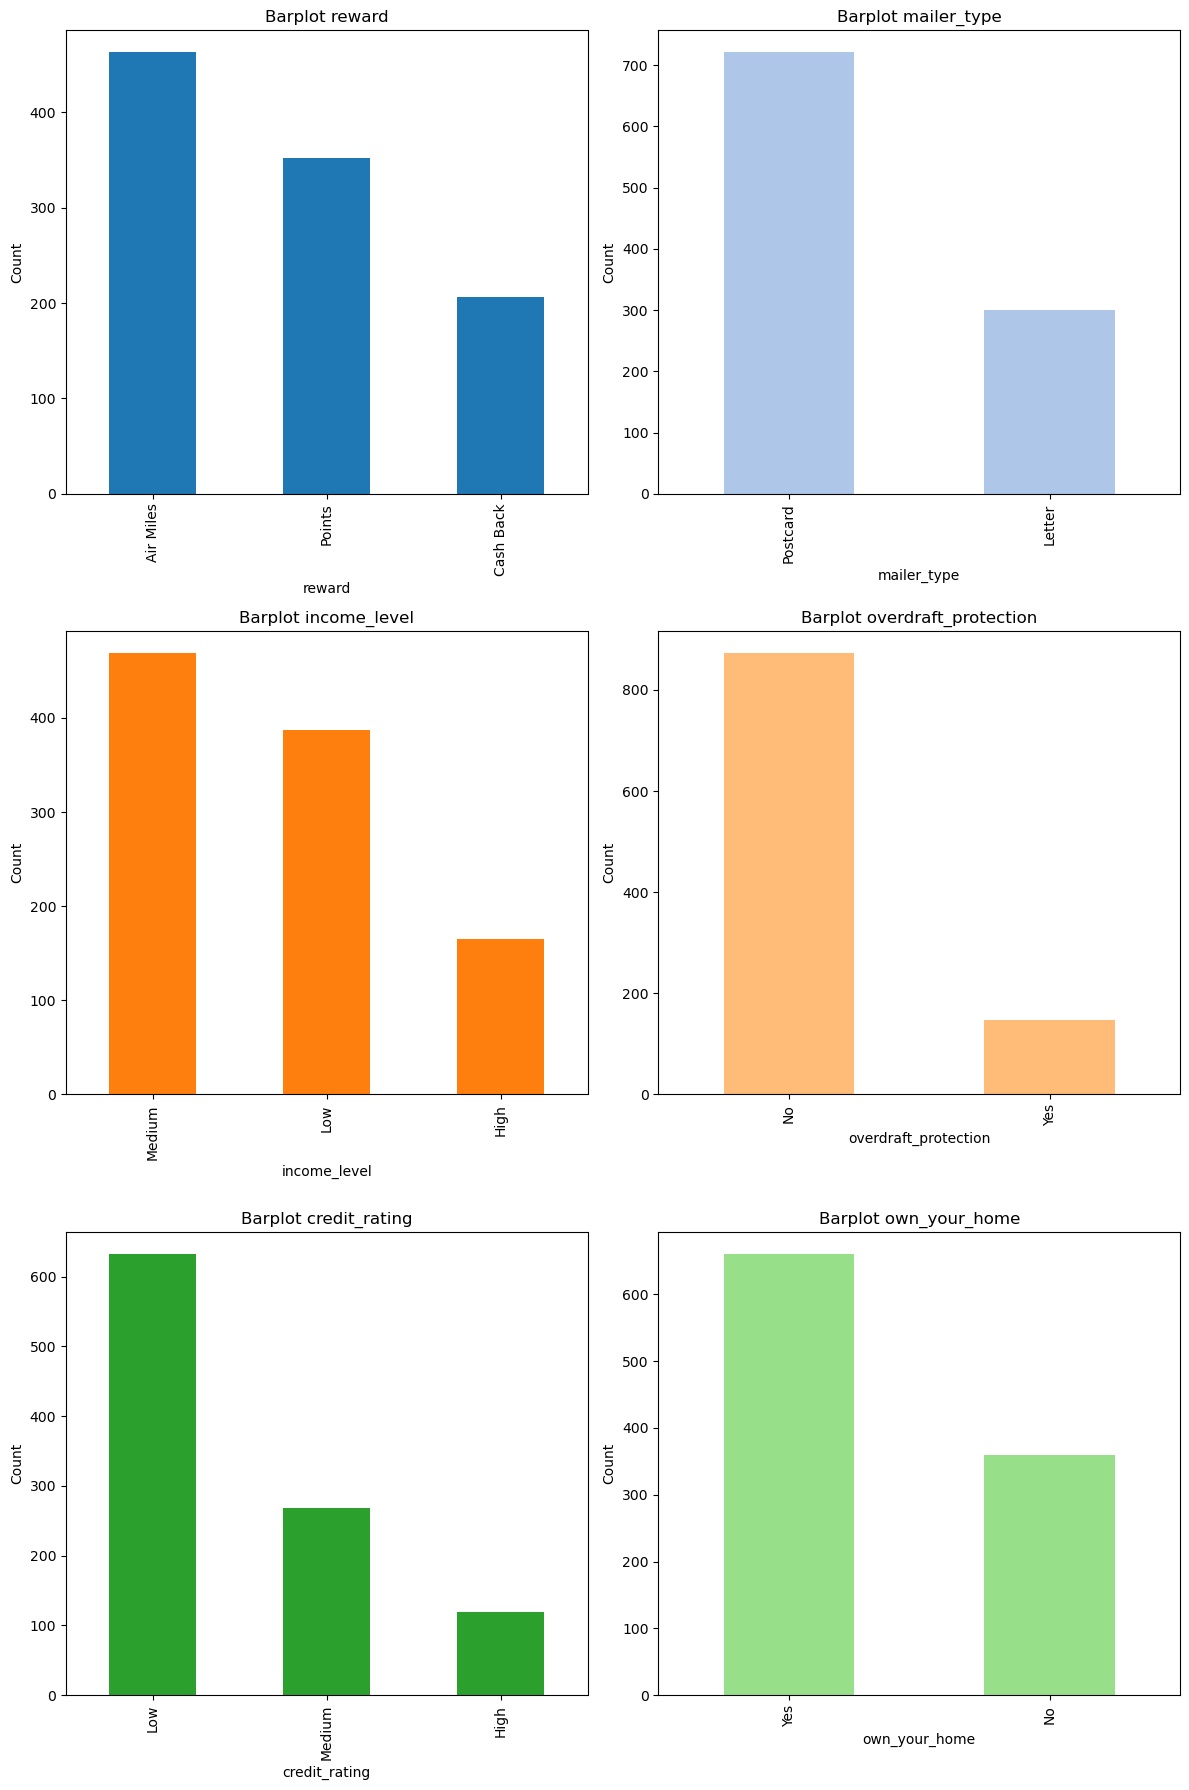

In [279]:
graficos_por_fila = 2
filas = (len(sub_yes.columns) + graficos_por_fila - 1) // graficos_por_fila
colores = plt.cm.tab20.colors
fig, axs = plt.subplots(filas, graficos_por_fila, figsize=(12, 6 * filas))
for i, (column, color) in enumerate(zip(sub_yes.columns, colores)):
    ax = axs[i // graficos_por_fila, i % graficos_por_fila]
    sub_yes[column].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Barplot {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

After analyzing the graphs the most relevant insights from my point of view are:
- most of the customers that have accepted the offer are with air miles reward
- their credit rating is mostly low
- they have receive a postcard instead of a letter

## to analyze also the no and understand better the profile that accepts the offer i will do the same for 'No' to the offer

In [280]:
#creating subset when answer to the offer is 'Yes'
sub_no = cat_df[cat_df['offer_accepted'] == 'No']

In [281]:
#dropping column offer accepted before plotting
sub_no = sub_no.drop('offer_accepted', axis=1)

In [282]:
sub_no.head()

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes


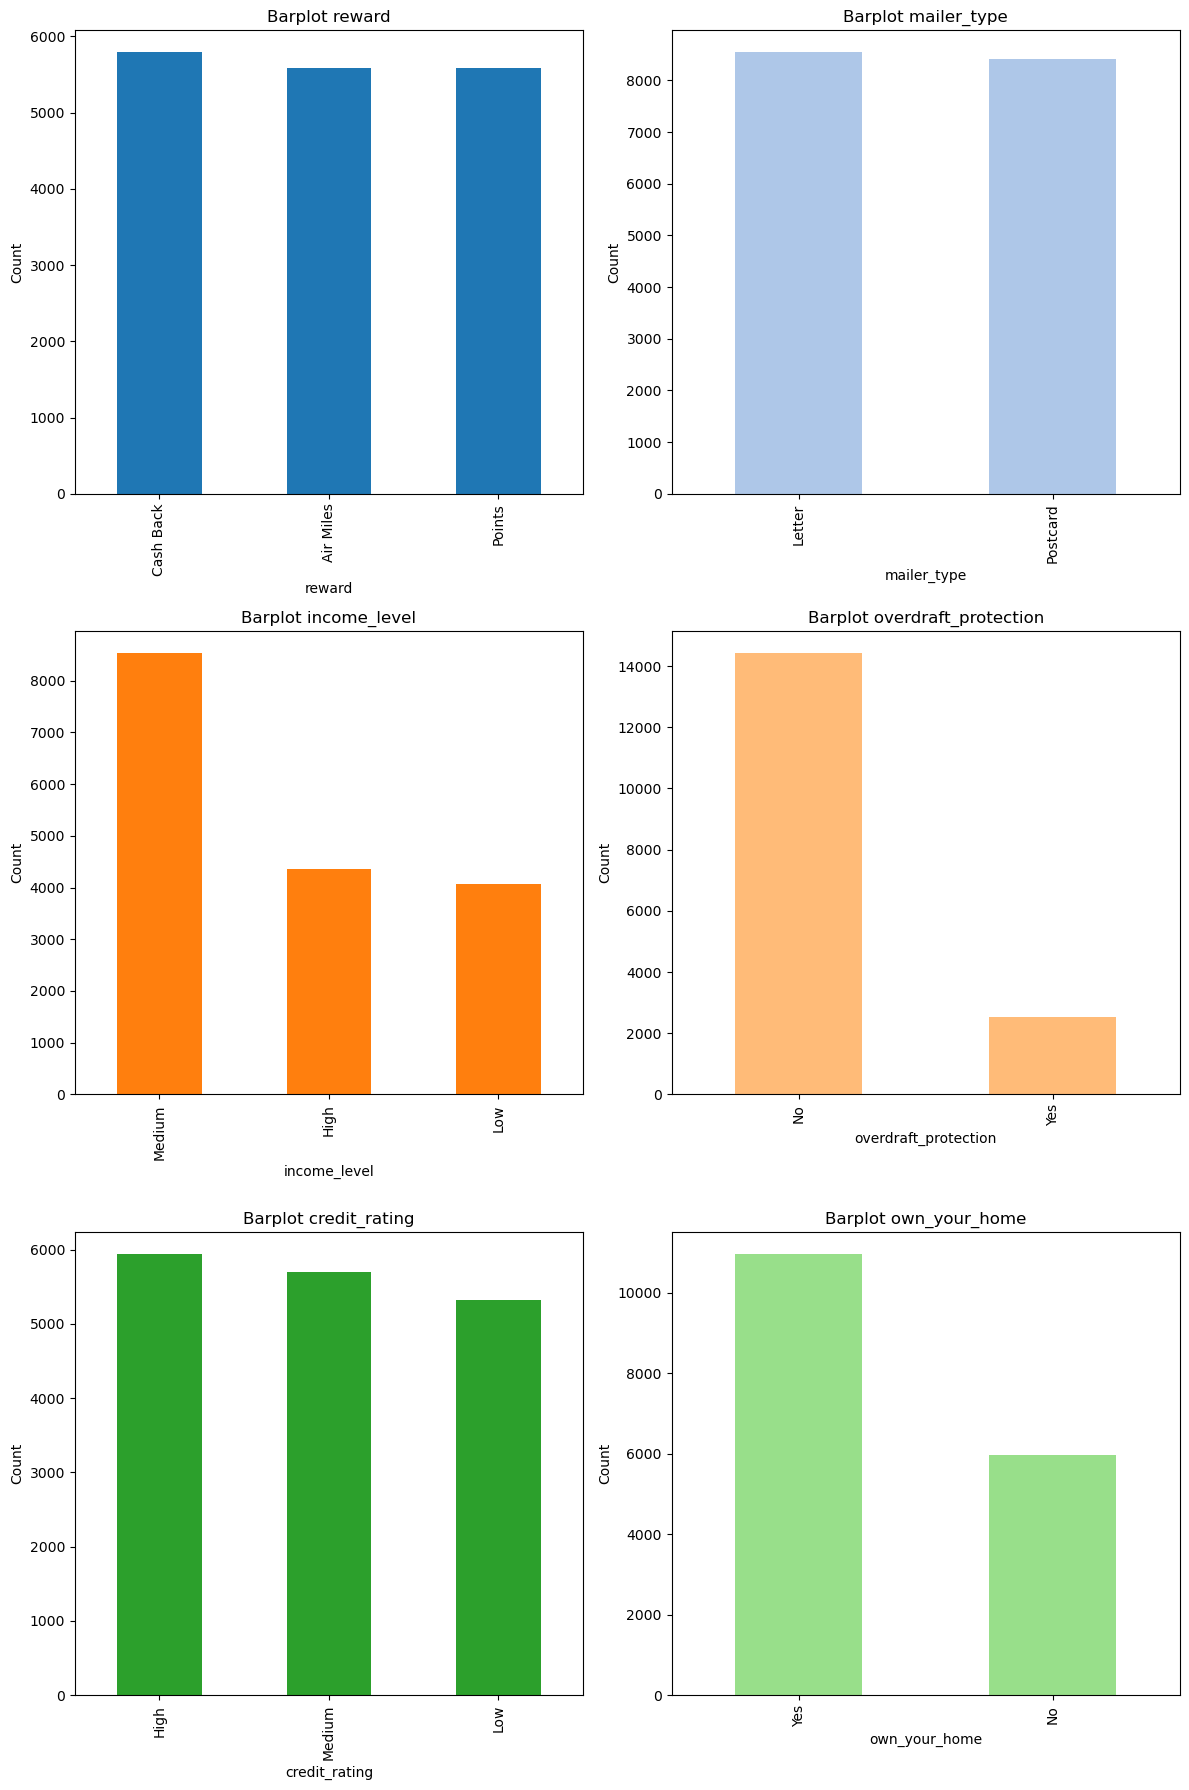

In [283]:
graficos_por_fila = 2
filas = (len(sub_no.columns) + graficos_por_fila - 1) // graficos_por_fila
colores = plt.cm.tab20.colors
fig, axs = plt.subplots(filas, graficos_por_fila, figsize=(12, 6 * filas))
for i, (column, color) in enumerate(zip(sub_no.columns, colores)):
    ax = axs[i // graficos_por_fila, i % graficos_por_fila]
    sub_no[column].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Barplot {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

The most relevant insight that i took from this is that customers that accept the offer have a bad credit rating

In [284]:
#i will divide the num_df into discrete and continuous variables
num_df_continuas = num_df.select_dtypes(include=['float64'])

In [301]:
num_df_discretas.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size
0,1,2,1,4
1,1,2,2,5
2,2,2,1,2
3,2,1,1,4
4,1,2,1,6


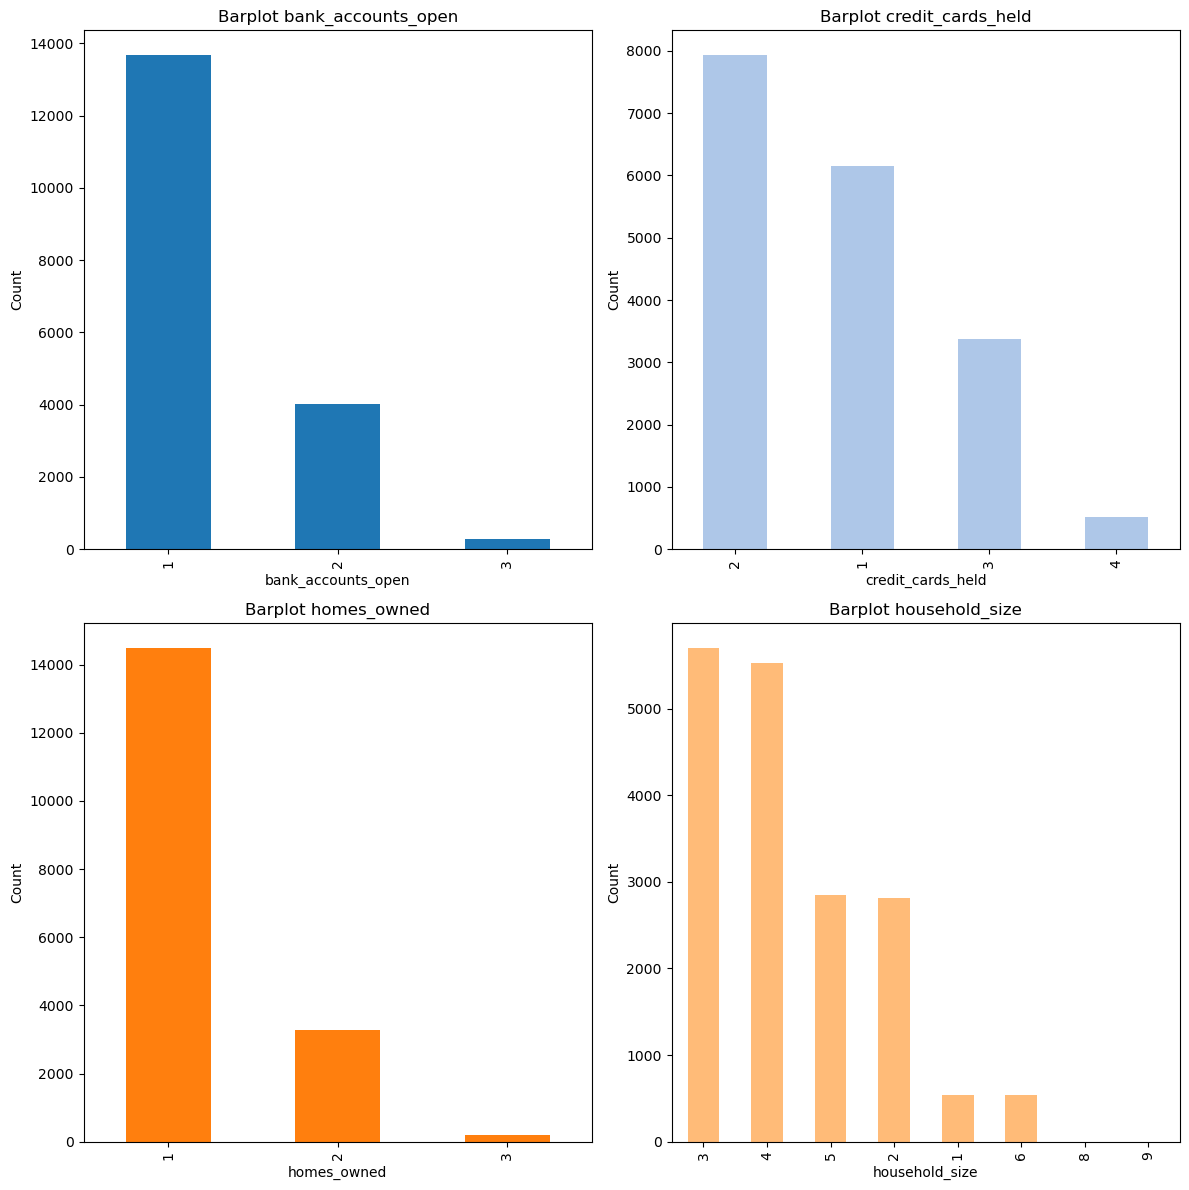

In [302]:
graficos_por_fila = 2
filas = (len(num_df_discretas.columns) + graficos_por_fila - 1) // graficos_por_fila
colores = plt.cm.tab20.colors
fig, axs = plt.subplots(filas, graficos_por_fila, figsize=(12, 6 * filas))
for i, (column, color) in enumerate(zip(num_df_discretas.columns, colores)):
    ax = axs[i // graficos_por_fila, i % graficos_por_fila]
    num_df_discretas[column].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Barplot {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

- Most of clients have 1 house
- Most of the families are composed of 3 people
- Majority of customers have only 1 bank account and 2 credit cards

In [303]:
subset_y = customer_df[['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'offer_accepted']]

In [304]:
subsety = subset_y[subset_y['offer_accepted'] == 'Yes']

In [305]:
subsety = subsety.drop('offer_accepted', axis=1)

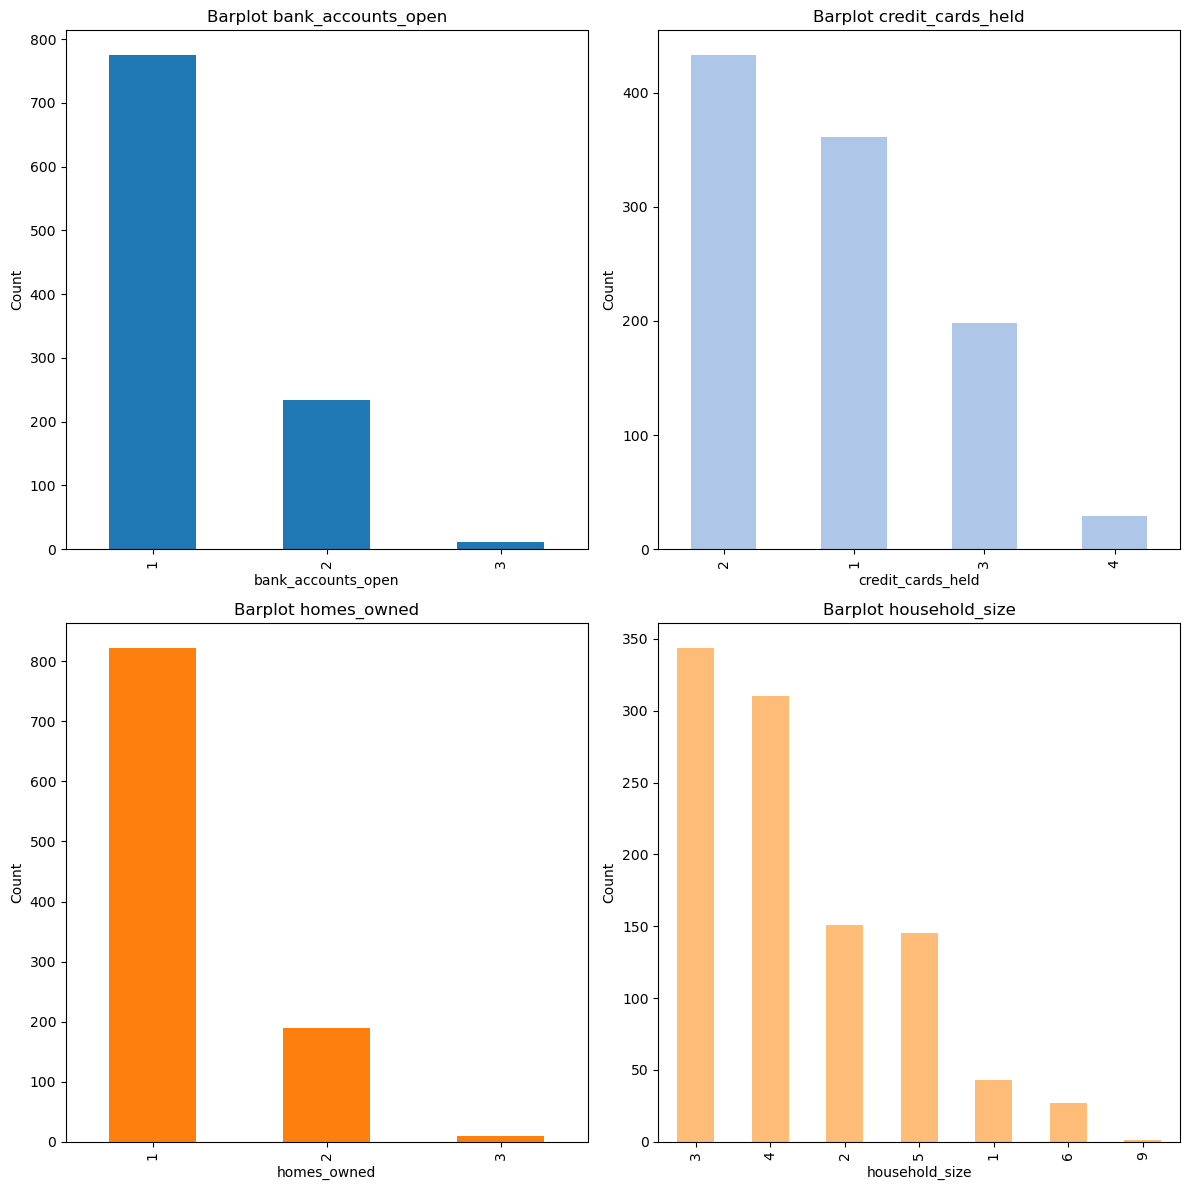

In [306]:
graficos_por_fila = 2
filas = (len(subsety.columns) + graficos_por_fila - 1) // graficos_por_fila
colores = plt.cm.tab20.colors
fig, axs = plt.subplots(filas, graficos_por_fila, figsize=(12, 6 * filas))
for i, (column, color) in enumerate(zip(subsety.columns, colores)):
    ax = axs[i // graficos_por_fila, i % graficos_por_fila]
    subsety[column].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Barplot {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

for clients that have accepted the offer we do not get new relevant insights 

In [307]:
subset_n = customer_df[['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'offer_accepted']]

In [308]:
subsetn = subset_n[subset_n['offer_accepted'] == 'No']

In [309]:
subsetn = subsetn.drop('offer_accepted', axis=1)

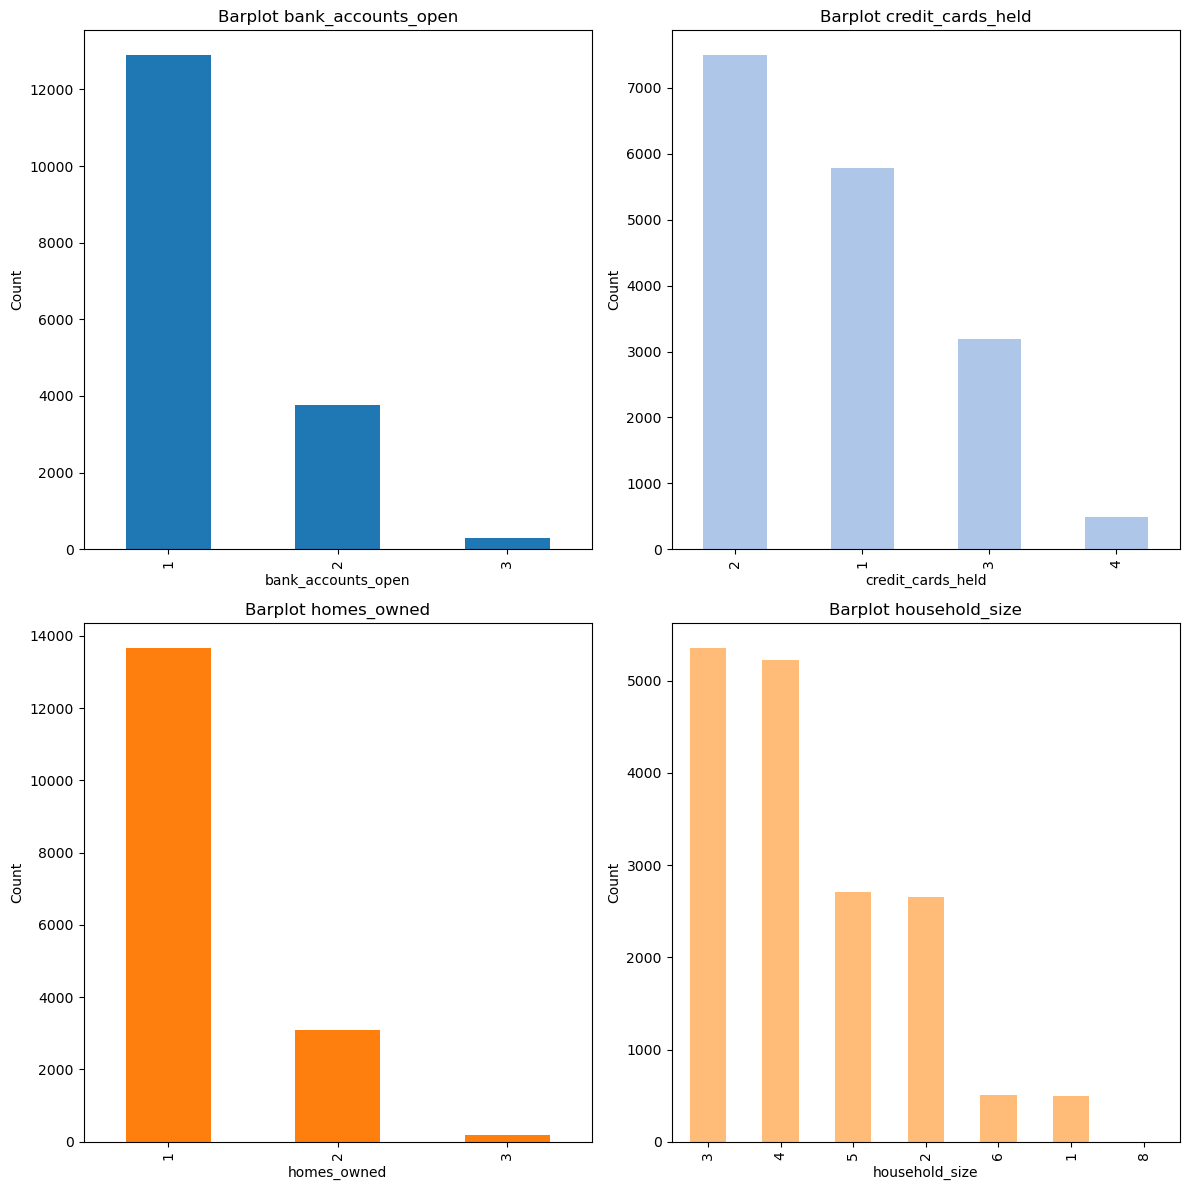

In [310]:
graficos_por_fila = 2
filas = (len(subsetn.columns) + graficos_por_fila - 1) // graficos_por_fila
colores = plt.cm.tab20.colors
fig, axs = plt.subplots(filas, graficos_por_fila, figsize=(12, 6 * filas))
for i, (column, color) in enumerate(zip(subsetn.columns, colores)):
    ax = axs[i // graficos_por_fila, i % graficos_por_fila]
    subsetn[column].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Barplot {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

also no new relevant insights with no answers

## at the moment the most relevant insight from my point of view is that the clients that have accepted the offer have a bad credit rating

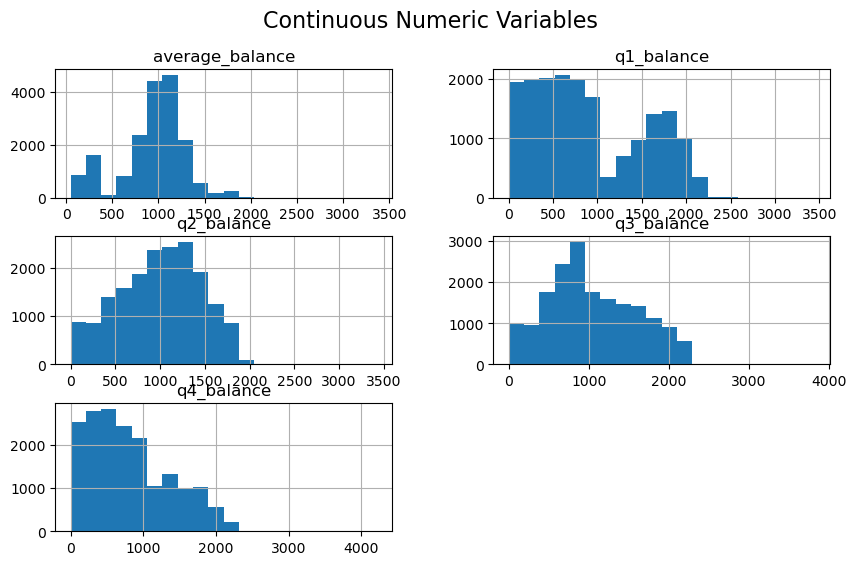

In [311]:
num_df_continuas.hist(figsize=(10, 6), bins=20)
plt.suptitle("Continuous Numeric Variables", fontsize=16)
plt.show()

We note that the average, Q2 & Q3 balances have relatively normal distributions, whereas the Q1 & Q4 balances generally tend to be on the lower side

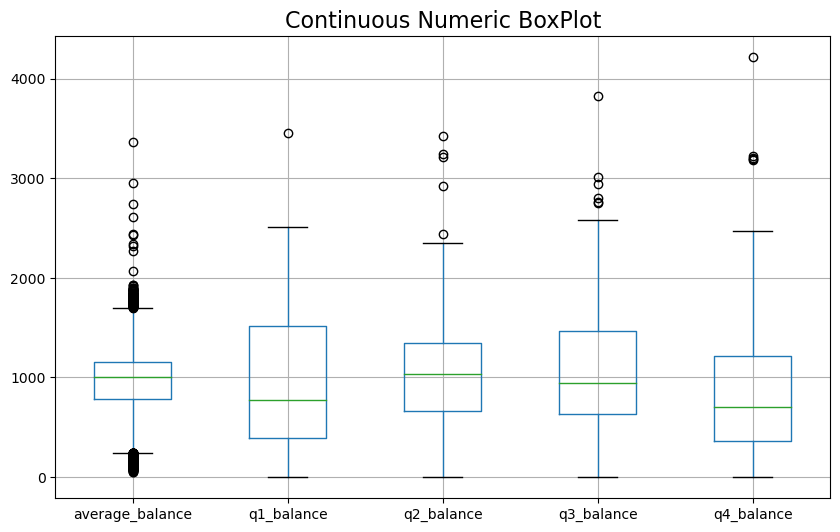

In [312]:
plt.figure(figsize=(10, 6))
num_df_continuas.boxplot()
plt.title("Continuous Numeric BoxPlot", fontsize=16)
plt.show()

the balance and avg balance has a similar distribution

/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_9077/51081146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_df.corr()
/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_9077/51081146.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(customer_df.corr())
/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_9077/51081146.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(customer_df.corr(), mask=mask

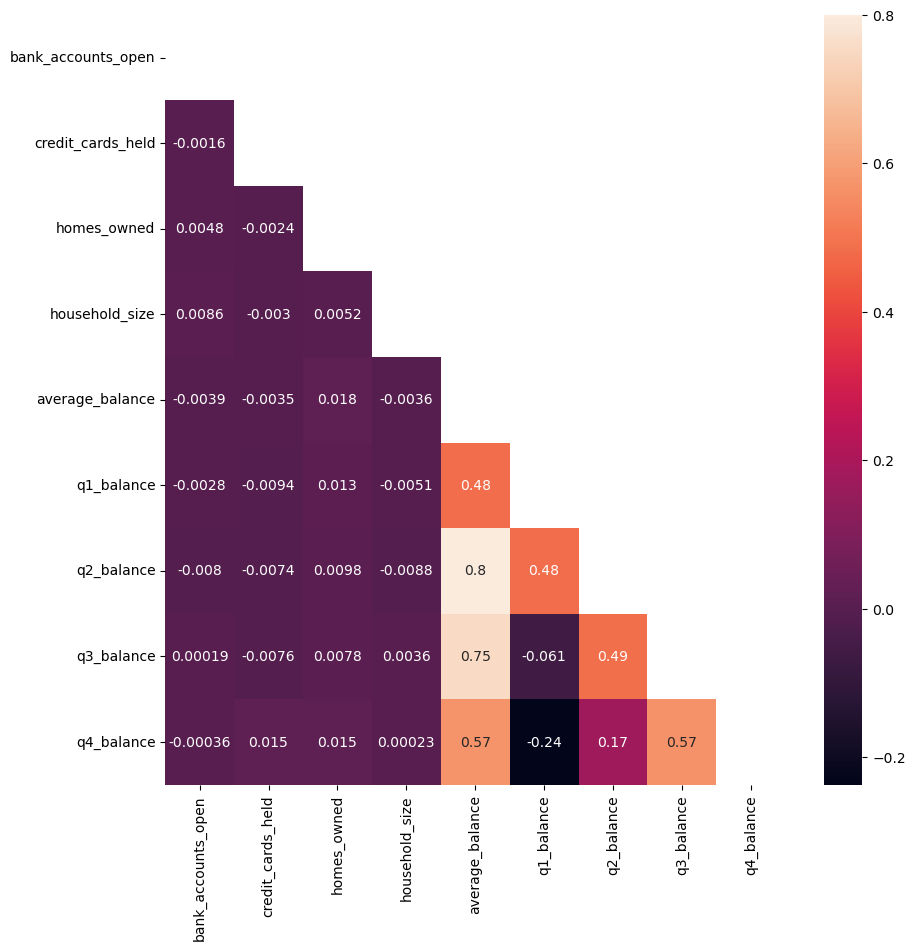

In [314]:
# Calculate correlation matrix
customer_df.corr()

# Create heatmap
mask = np.zeros_like(customer_df.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(customer_df.corr(), mask=mask, annot=True)
plt.show()

avg balance is highly correlated with the other balances as is expected. for the model i will run first with the avg and then with all the q balances to see how is performing

In [315]:
customer_df.to_csv('creditcardmarketing_post_cleaning.csv')